# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from skimage import color
from skimage import io

Using TensorFlow backend.


Unzipping dataset in drive(if done on colab)

In [2]:
! unzip 'drive/My Drive/1272_2280_bundle_archive.zip'

unzip:  cannot find or open drive/My Drive/1272_2280_bundle_archive.zip, drive/My Drive/1272_2280_bundle_archive.zip.zip or drive/My Drive/1272_2280_bundle_archive.zip.ZIP.


## Importing Training Set

Taking all file names of images in the training set folder (trainingSet) and converting to a numpy array

In [3]:
from skimage import color
from skimage import io
x_train=np.empty((42000,28,28),dtype='uint8')
y_train = np.empty((42000,1),dtype='uint8')
c = 0
for x in range(10):
   training_folder = "trainingSet/trainingSet/"+str(x)
   X_train_file=[f for f in os.listdir(training_folder) if os.path.isfile(os.path.join(training_folder, f))] 
   for z in X_train_file:
     x_train[c] = np.array(io.imread('trainingSet/trainingSet/'+str(x)+'/'+z))
     y_train[c] = x
     c+=1

## Importing Training Set

Taking all file names of images in the test set folder (trainingSample) and converting to a numpy array

In [4]:
x_test=np.empty((600,28,28),dtype='uint8')
y_test = np.empty((600,1),dtype='uint8')
c = 0
for x in range(10):
   testing_folder = "trainingSample/trainingSample/"+str(x)
   X_test_file=[f for f in os.listdir(testing_folder) if os.path.isfile(os.path.join(testing_folder, f))] 
   for z in X_test_file:
     x_test[c] = np.array(io.imread('trainingSample/trainingSample/'+str(x)+'/'+z))
     y_test[c] = x
     c+=1

Checking type of training and test set

In [5]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))
len(x_train)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


42000

Checking shape of training and test set

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 28, 28)
(600, 28, 28)
(42000, 1)
(600, 1)


Displaying first 9 images of training set

<Figure size 432x288 with 0 Axes>

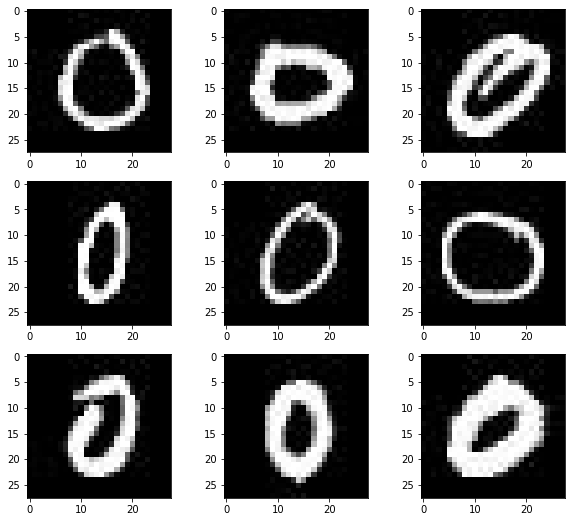

In [7]:
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

Printing examples in 'y_train'

In [8]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i][0])

0
0
0
0
0


Checking the minimum and maximum values of x_train

In [9]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


Data Normalization

In [10]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

Checking the minimum and maximum values of x_train

In [11]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


Reshaping input data since the input data have to be converted from 3 dimensional format to 2 dimensional format to be fed into the K-Means Clustering algorithm

In [12]:
# Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [13]:
# Checking the shape
print(X_train.shape)
print(X_test.shape)

(42000, 784)
(600, 784)


### Building the model

In [14]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_train)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [15]:
kmeans.labels_

array([3, 3, 3, ..., 6, 2, 2], dtype=int32)

Concatinating y_train and y_test since retrieve_info takes 1D array

In [16]:
y_train = np.concatenate(y_train)
y_test = np.concatenate(y_test)

 Associates most probable label with each cluster in KMeans model
  returns: dictionary of clusters assigned to each label

In [17]:
def retrieve_info(cluster_labels,y_train):
  # Initializing
  reference_labels = {} 
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [18]:
retrieve_info(kmeans.labels_,y_train)

{0: 6, 1: 1, 2: 7, 3: 0, 4: 3, 5: 3, 6: 4, 7: 8, 8: 2, 9: 1}

We run the ‘retrieve_info’ function and process it to get ‘number_labels’ which denotes the number displayed in image.

In [19]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

Comparing Predicted values and Actual values

In [20]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[0 0 0 3 0 3 3 6 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5563809523809524


Function to calculate metrics for the model

In [22]:
# Function to calculate metrics for the model
def calculate_metrics(model,output):
  print('Number of clusters is {}'.format(model.n_clusters))
  print('Inertia : {}'.format(model.inertia_))
  print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

Applying K means randomply on a certain cluster numbers and checking the accuracy

In [23]:
from sklearn import metrics
cluster_number = [15,20,35,64,170,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))# Initialize the K-Means model
  kmeans = MiniBatchKMeans(n_clusters = i)# Fitting the model to training set
  kmeans.fit(X_train)# Calculating the metrics
  calculate_metrics(kmeans,y_train)# Calculating reference_labels
  reference_labels = retrieve_info(kmeans.labels_,y_train)# ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))
  for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
  print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
  print('\n')

Number of clusters is 15
Inertia : 1508711.5
Homogeneity :       0.5307812516400855
Accuracy score : 0.6082380952380952


Number of clusters is 20
Inertia : 1449204.125
Homogeneity :       0.5738239677188418
Accuracy score : 0.6687142857142857


Number of clusters is 35
Inertia : 1322793.0
Homogeneity :       0.6900984662102265
Accuracy score : 0.7637380952380952


Number of clusters is 64
Inertia : 1220802.375
Homogeneity :       0.7462026029706282
Accuracy score : 0.8054761904761905


Number of clusters is 170
Inertia : 1079864.0
Homogeneity :       0.8169521826558891
Accuracy score : 0.8736904761904762


Number of clusters is 256
Inertia : 1024545.0
Homogeneity :       0.8389670698708878
Accuracy score : 0.8856190476190476




Testing model on Testing set

In [24]:
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = 165)
# Fitting the model to  testing set
kmeans.fit(X_test)
# Calculating the metrics
calculate_metrics(kmeans,y_test)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]] 
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

Number of clusters is 165
Inertia : 11285.1162109375
Homogeneity :       0.8327428632078636
Accuracy score : 0.8416666666666667




In [25]:
# Cluster centroids is stored in ‘centroids’
centroids = kmeans.cluster_centers_

In [26]:
centroids.shape

(165, 784)

In [27]:
centroids = centroids.reshape(165,28,28)

In [28]:
centroids = centroids * 255

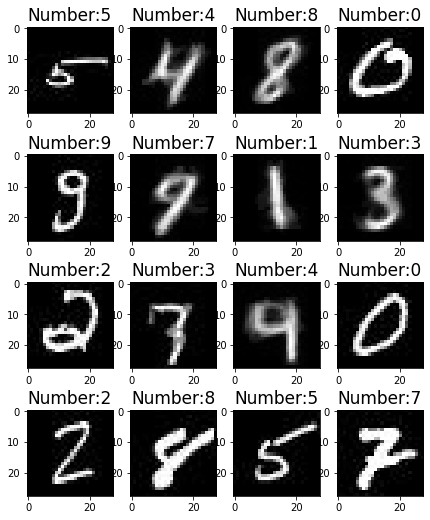

In [29]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
  plt.subplots_adjust(bottom)
  plt.subplot(4,4,i+1)
  plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
  plt.imshow(centroids[i])

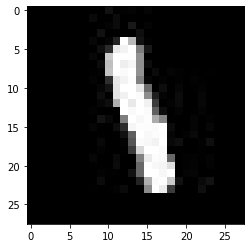

In [30]:
# Reading the image
image = plt.imread('testSample/testSample/img_39.jpg')
plt.imshow(image)

In [31]:
image = io.imread('testSample/testSample/img_39.jpg')

In [32]:
# Reshaping into a row vector
image = image.reshape(1,28*28)

In [33]:
image = image.astype(np.float32)

In [34]:
predicted_cluster = kmeans.predict(image)

In [35]:
number_labels[[predicted_cluster]]

/home/jainam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([1.])